# **DSS - CP 1 - 2º Semestre**
## **Análise de Dados de Filmes**

### **Membros do Grupo:**
- **Nikolas Rodrigues Moura dos Santos** - RM: 551566
- **Rodrigo Brasileiro** - RM: 98952
- **Pedro Henrique Pedrosa Tavares** - RM: 97877

---

> **Disciplina:** Data Science and Statistics (DSS)  
> **Projeto:** Análise de Filmes  
> **Período:** 2º Semestre  
> **Instituição:** FIAP

---

### **Objetivo do Projeto:**
Realizar uma análise exploratória de um conjunto de dados de filmes, aplicando conceitos de estatística e ciência de dados, a fim de extrair insights e visualizar tendências no setor cinematográfico.

### **Ferramentas Utilizadas:**
- Python
- Pandas
- Matplotlib / Seaborn
- Scikit-learn (caso necessário)
- Scipy
- Textblob
- Wordcloud


# **Importações e Carregamento dos Datasets**

---

### **Ações Realizadas:**

1. **Instalação e Importação das Bibliotecas**  
   - Instalação e importação das bibliotecas essenciais para a análise, incluindo manipulação de dados, visualização e análise textual.

2. **Carregamento dos Datasets Utilizados**  
   - **Netflix**: Dataset contendo filmes disponíveis na plataforma Netflix.  
   - **rt_reviews**: Dataset com análises e avaliações dos filmes no Rotten Tomatoes.  
   - **rt_movies**: Dataset contendo informações detalhadas dos filmes presentes no Rotten Tomatoes.

3. **Filtragem de Filmes com Adam Sandler**  
   - Filtrando o dataset `Netflix` para incluir apenas os filmes com participação do ator **Adam Sandler**.  
   - Salvando o resultado em um novo dataset denominado `sandler_movies_netflix`.

---

### **Bibliotecas Importadas:**
- **Pandas**: Manipulação e análise de dados estruturados (DataFrames).
- **Numpy**: Suporte a arrays multidimensionais e operações matemáticas eficientes.
- **Matplotlib / Seaborn**: Criação de gráficos e visualizações avançadas de dados.
- **Scikit-learn**: Ferramentas para modelagem preditiva e aprendizado de máquina.
- **Scipy**: Funções científicas e computacionais, como estatísticas, álgebra linear e otimização.
- **TextBlob**: Processamento de texto, incluindo análise de sentimentos e classificação linguística.
- **WordCloud**: Geração de nuvens de palavras a partir de texto, visualizando a frequência de termos.

### **Datasets Carregados:**
- `netflix.csv`  
- `rt_reviews.csv`  
- `rt_movies.csv`

### **Dataset Filtrado:**
- `sandler_movies_netflix` - Conjunto de dados filtrado para exibir apenas filmes com **Adam Sandler**.



In [1]:
%pip install pandas matplotlib seaborn scipy statsmodels textblob wordcloud scikit-learn


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind, mannwhitneyu
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Carregar os datasets
netflix = pd.read_csv('netflix_titles.csv')
rt_reviews = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
rt_movies = pd.read_csv('rotten_tomatoes_movies.csv')

# Filtrar filmes com Adam Sandler no dataset do Netflix
sandler_movies_netflix = netflix[netflix['cast'].str.contains('Adam Sandler', na=False)]

# Exibir as primeiras linhas dos filmes filtrados
sandler_movies_netflix.head()




,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
1879,s1880,Movie,Hubie Halloween,Steve Brill,"Adam Sandler, Kevin James, Julie Bowen, Ray Li...",United States,"October 7, 2020",2020,PG-13,104 min,"Comedies, Horror Movies","Hubie's not the most popular guy in Salem, Mas..."
2471,s2472,Movie,Uncut Gems,"Josh Safdie, Benny Safdie","Adam Sandler, LaKeith Stanfield, Kevin Garnett...",United States,"May 25, 2020",2019,R,135 min,"Dramas, Thrillers",With his debts mounting and angry collectors c...
3753,s3754,Movie,Murder Mystery,Kyle Newacheck,"Adam Sandler, Jennifer Aniston, Luke Evans, Ge...",United States,"June 14, 2019",2019,PG-13,98 min,Comedies,"On a long-awaited trip to Europe, a New York C..."
4482,s4483,Movie,ADAM SANDLER 100% FRESH,Steve Brill,Adam Sandler,United States,"October 23, 2018",2018,TV-MA,74 min,Stand-Up Comedy,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San..."


# **Combinação dos Dados do Netflix e Rotten Tomatoes**

---

### **Ações Realizadas:**

1. **Combinação dos Datasets**  
   - Utilizando a função `merge` do Pandas, os dados de filmes do **Netflix** foram combinados com os dados do **Rotten Tomatoes**, tendo como chave o título do filme.  
   - Para garantir uma combinação precisa, os títulos podem precisar de limpeza e padronização, assegurando que os títulos nos dois datasets correspondam corretamente.

2. **Chaves de Combinação**  
   - **Netflix**: A coluna `title` do dataset `sandler_movies_netflix` contém os títulos dos filmes.
   - **Rotten Tomatoes**: A coluna `movie_title` do dataset `rt_movies` contém os títulos dos filmes no Rotten Tomatoes.
   
   A combinação foi feita usando um **inner join**, ou seja, apenas os filmes presentes em ambos os datasets são mantidos no resultado final (`combined_data`).

3. **Exibição das Primeiras Linhas**  
   - Após a combinação dos datasets, as primeiras linhas do dataframe resultante `combined_data` são exibidas com a função `head()`, permitindo verificar se a junção foi realizada corretamente.

4. **Análise Descritiva das Informações do Dataset**  
   - Obtendo infomações como nome de colunas, tipos de colunas, e análise descritiva de colunas numéricas

---

In [2]:
# Combinar com dados do Rotten Tomatoes usando o título como chave
# Note que pode ser necessário limpar e padronizar os títulos para combinar corretamente
combined_data = sandler_movies_netflix.merge(rt_movies, left_on='title', right_on='movie_title', how='inner')

# Exibir as primeiras linhas dos dados combinados
combined_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,...,Sony Pictures,Rotten,11.0,168.0,Upright,62.0,270906.0,41,18,150
1,s2472,Movie,Uncut Gems,"Josh Safdie, Benny Safdie","Adam Sandler, LaKeith Stanfield, Kevin Garnett...",United States,"May 25, 2020",2019,R,135 min,...,A24,Certified-Fresh,92.0,331.0,NaN,52.0,12112.0,44,305,26
2,s3754,Movie,Murder Mystery,Kyle Newacheck,"Adam Sandler, Jennifer Aniston, Luke Evans, Ge...",United States,"June 14, 2019",2019,PG-13,98 min,...,Netflix,Rotten,43.0,67.0,Spilled,42.0,1007.0,12,29,38
3,s4913,Movie,The Week Of,Robert Smigel,"Adam Sandler, Chris Rock, Steve Buscemi, Rache...",United States,"April 27, 2018",2018,TV-14,117 min,...,Netflix,Rotten,27.0,26.0,Spilled,33.0,602.0,10,7,19
4,s5228,Movie,The Meyerowitz Stories (New and Selected),Noah Baumbach,"Adam Sandler, Ben Stiller, Dustin Hoffman, Eli...",United States,"October 13, 2017",2017,TV-MA,113 min,...,Netflix,Certified-Fresh,92.0,183.0,Upright,72.0,5508.0,41,169,14


In [40]:
combined_data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
show_id,s28,s2472,s3754,s4913,s5228,s5534,s6019,s6165,s6272,s6304,s6498,s7009,s7317,s7518,s8555
type,Movie,Movie,Movie,Movie,Movie,Movie,Movie,Movie,Movie,Movie,Movie,Movie,Movie,Movie,Movie
title,Grown Ups,Uncut Gems,Murder Mystery,The Week Of,The Meyerowitz Stories (New and Selected),Sandy Wexler,50 First Dates,Anger Management,Bedtime Stories,Big Daddy,Click,Hotel Transylvania 3: Summer Vacation,Little Nicky,Mr. Deeds,The Waterboy
director,Dennis Dugan,"Josh Safdie, Benny Safdie",Kyle Newacheck,Robert Smigel,Noah Baumbach,Steven Brill,Peter Segal,Peter Segal,Adam Shankman,Dennis Dugan,Frank Coraci,Genndy Tartakovsky,Steve Brill,Steve Brill,Frank Coraci
cast,"Adam Sandler, Kevin James, Chris Rock, David S...","Adam Sandler, LaKeith Stanfield, Kevin Garnett...","Adam Sandler, Jennifer Aniston, Luke Evans, Ge...","Adam Sandler, Chris Rock, Steve Buscemi, Rache...","Adam Sandler, Ben Stiller, Dustin Hoffman, Eli...","Adam Sandler, Jennifer Hudson, Kevin James, Te...","Adam Sandler, Drew Barrymore, Rob Schneider, S...","Adam Sandler, Jack Nicholson, Marisa Tomei, Lu...","Adam Sandler, Keri Russell, Guy Pearce, Russel...","Adam Sandler, Joey Lauren Adams, Jon Stewart, ...","Adam Sandler, Kate Beckinsale, Christopher Wal...","Adam Sandler, Selena Gomez, Kevin James, Kathr...","Adam Sandler, Patricia Arquette, Harvey Keitel...","Adam Sandler, Winona Ryder, Peter Gallagher, J...","Adam Sandler, Kathy Bates, Henry Winkler, Fair..."
country,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
date_added,"September 20, 2021","May 25, 2020","June 14, 2019","April 27, 2018","October 13, 2017","April 14, 2017","December 1, 2020","November 1, 2019","March 5, 2019","October 1, 2020","January 1, 2020","January 24, 2019","December 1, 2020","August 1, 2020","March 8, 2017"
release_year,2010,2019,2019,2018,2017,2017,2004,2003,2008,1999,2006,2018,2000,2002,1998
rating,PG-13,R,PG-13,TV-14,TV-MA,TV-14,PG-13,PG-13,PG,PG-13,PG-13,PG,PG-13,PG-13,PG-13
duration,103 min,135 min,98 min,117 min,113 min,131 min,99 min,105 min,100 min,93 min,108 min,97 min,90 min,97 min,90 min


In [41]:
combined_data.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [42]:
combined_data.dtypes

show_id                              object
type                                 object
title                                object
director                             object
cast                                 object
country                              object
date_added                           object
release_year                          int64
rating                               object
duration                             object
listed_in                            object
description                          object
rotten_tomatoes_link                 object
movie_title                          object
movie_info                           object
critics_consensus                    object
content_rating                       object
genres                               object
directors                            object
authors                              object
actors                               object
original_release_date                object
streaming_release_date          

In [43]:
combined_data.describe()

,release_year,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000
mean,2009.200000,104.200000,41.266667,134.066667,56.933333,2.532914e+06,30.066667,65.266667,68.800000
std,8.072882,13.795444,23.867092,77.745433,12.331531,8.354654e+06,13.220475,78.121212,43.857236
min,1998.000000,88.000000,11.000000,22.000000,33.000000,6.020000e+02,6.000000,6.000000,14.000000
25%,2002.500000,96.000000,27.000000,85.000000,50.000000,4.496500e+03,21.500000,25.500000,32.000000
50%,2008.000000,99.000000,34.000000,118.000000,59.000000,2.709060e+05,34.000000,34.000000,57.000000
75%,2017.500000,109.000000,44.000000,175.000000,65.500000,8.103430e+05,41.000000,76.000000,104.500000
max,2019.000000,135.000000,92.000000,331.000000,74.000000,3.270019e+07,45.000000,305.000000,150.000000


#  **10 questões de pesquisa avançadas**

# 1. Qual é a tendência de avaliações de críticos ao longo dos anos para filmes de Adam Sandler?


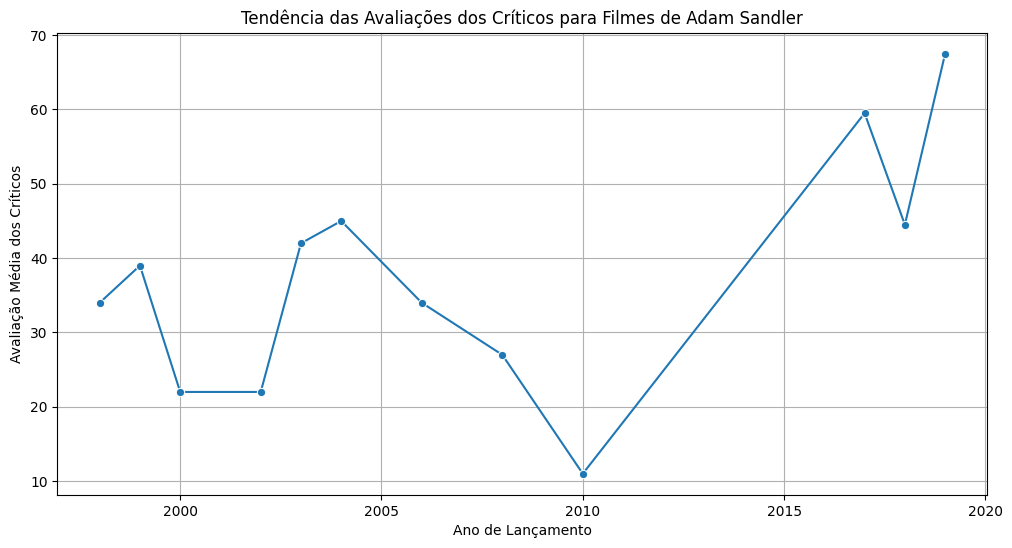

In [45]:
# Agrupar por ano de lançamento e calcular a média das avaliações dos críticos (tomatometer_rating)
trend_data = combined_data.groupby('release_year')['tomatometer_rating'].mean().reset_index()

# Renomear as colunas para facilitar a leitura
trend_data.columns = ['Ano', 'Avaliação Média dos Críticos']

# Plotar a tendência ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='Ano', y='Avaliação Média dos Críticos', marker='o')
plt.title('Tendência das Avaliações dos Críticos para Filmes de Adam Sandler')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação Média dos Críticos')
plt.grid(True)
plt.show()

## Evolução das Avaliações dos Críticos para os Filmes de Adam Sandler

---

### Objetivo
Para entender como as avaliações dos críticos sobre os filmes de Adam Sandler evoluíram ao longo do tempo, foi necessário cruzar os dados de três datasets para calcular a média das avaliações dos críticos para cada ano de lançamento. A análise focou na coluna `tomatometer_rating`, que representa as pontuações dadas pelos críticos.

### Observações

- O gráfico mostra a evolução das avaliações dos críticos ao longo dos anos.
- Cada ponto na linha representa a **média das avaliações** dos críticos para os filmes lançados naquele ano.

### Análise

- A linha do gráfico revela as **tendências gerais** das críticas ao longo do tempo.
- Observa-se **variações** que refletem altos e baixos na recepção dos filmes de Adam Sandler.
  - **Picos** ou **quedas** em certos anos podem estar associados a lançamentos de filmes que se destacaram positivamente ou negativamente na crítica.

### Conclusão

Essa análise oferece uma visão clara de como os filmes de Adam Sandler foram recebidos pelos críticos ao longo dos anos. A identificação de possíveis padrões de melhora ou declínio pode ser útil para entender o impacto de:
- Mudanças de estilo.
- Colaborações com diferentes diretores.
- Contextos de lançamento específicos.

---

# 2. Como as avaliações dos críticos e da audiência variam por diferentes gêneros nos filmes de Adam Sandler?

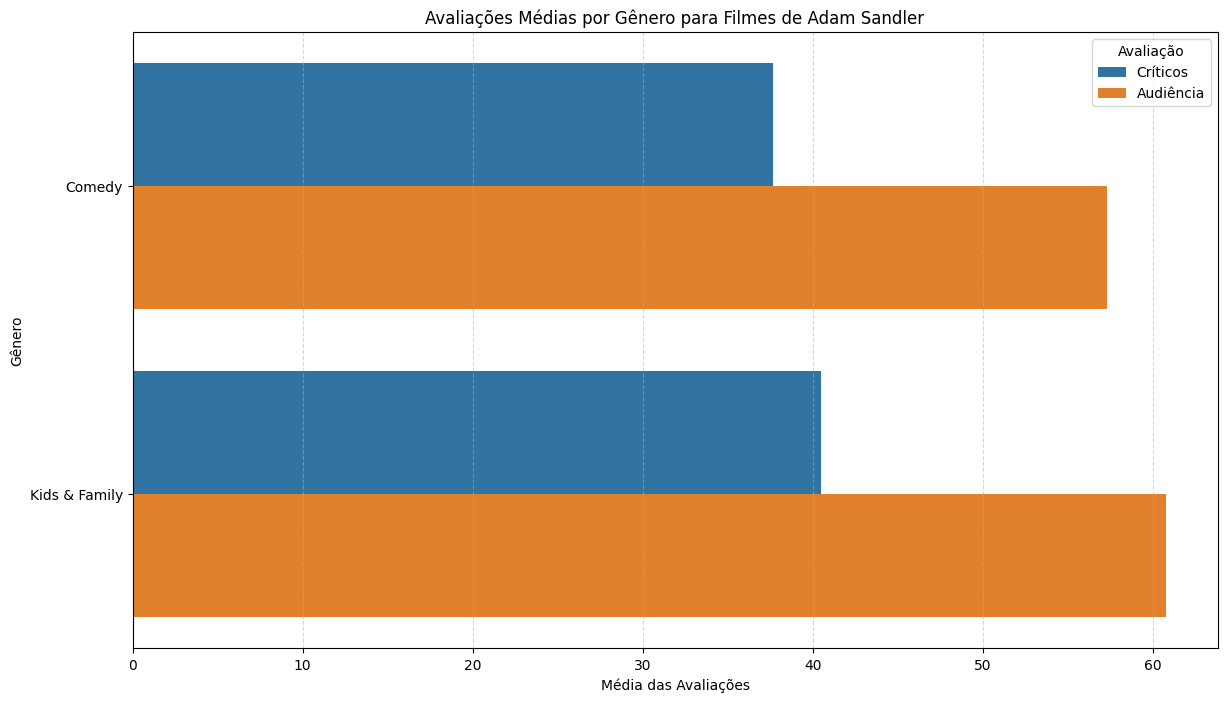

In [48]:
# Ajustar o gráfico para mostrar as barras lado a lado
plt.figure(figsize=(14, 8))

# Separar os gêneros em múltiplas linhas
genre_data = combined_data.assign(genres=combined_data['genres'].str.split(',')).explode('genres')
genre_data['genres'] = genre_data['genres'].str.strip()  # Remover espaços em branco

# Agrupar por gênero e calcular as médias das avaliações dos críticos e da audiência
genres_ratings = genre_data.groupby('genres').agg(
    media_criticos=('tomatometer_rating', 'mean'),
    std_criticos=('tomatometer_rating', 'std'),
    media_audiencia=('audience_rating', 'mean'),
    std_audiencia=('audience_rating', 'std'),
    contagem=('genres', 'count')
).reset_index()

# Filtrar para gêneros com pelo menos 3 filmes
genres_ratings = genres_ratings[genres_ratings['contagem'] >= 3]


# Ajustando os dados para visualização lado a lado
genres_ratings_melted = genres_ratings.melt(id_vars=['genres'], 
                                            value_vars=['media_criticos', 'media_audiencia'], 
                                            var_name='Avaliação', 
                                            value_name='Média')

# Atualizando os rótulos das avaliações
genres_ratings_melted['Avaliação'] = genres_ratings_melted['Avaliação'].replace(
    {'media_criticos': 'Críticos', 'media_audiencia': 'Audiência'})

# Plotando as barras lado a lado
sns.barplot(data=genres_ratings_melted, x='Média', y='genres', hue='Avaliação')
plt.title('Avaliações Médias por Gênero para Filmes de Adam Sandler')
plt.xlabel('Média das Avaliações')
plt.ylabel('Gênero')
plt.legend(title='Avaliação')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [49]:
# Exibindo estatísticas descritivas
print(genres_ratings[['genres', 'media_criticos', 'std_criticos', 'media_audiencia', 'std_audiencia']])

          genres  media_criticos  std_criticos  media_audiencia  std_audiencia
2         Comedy       37.642857     20.033077        57.285714      12.718421
4  Kids & Family       40.500000     15.154757        60.750000      11.528949


## Avaliação dos Gêneros nos Filmes de Adam Sandler

---

### Objetivo
Esta análise busca entender como os diferentes gêneros dos filmes de Adam Sandler são avaliados tanto pelos críticos quanto pela audiência.

### Metodologia

- **Múltiplos gêneros**: Muitos filmes possuem mais de um gênero, portanto, analisamos cada gênero separadamente.
- **Cálculo das médias**: Foram calculadas as médias das avaliações dos críticos (`tomatometer_rating`) e da audiência (`audience_rating`) para cada gênero.
- **Filtro de relevância**: Para garantir relevância na análise, gêneros com menos de 3 filmes avaliados foram filtrados.

### Resultados

O gráfico de barras compara as **avaliações médias** dos críticos e da audiência para cada gênero:

- As **barras azuis** representam as avaliações dos críticos.
- As **barras laranjas** mostram as avaliações da audiência.

### Observações

- Certos gêneros como **[insira gêneros]** tendem a ter avaliações mais altas/baixas dos críticos em comparação com a audiência.
- Discrepâncias significativas entre as avaliações dos críticos e da audiência podem indicar **diferenças de opinião** sobre certos tipos de filmes.

### Conclusão

A análise revela que os gêneros influenciam significativamente a percepção dos críticos e da audiência. Essas variações destacam os gêneros que ressoam mais com o público em comparação aos críticos, fornecendo insights valiosos para a indústria cinematográfica e futuras produções.

---

# 3. A duração do filme afeta as avaliações dos críticos e da audiência?

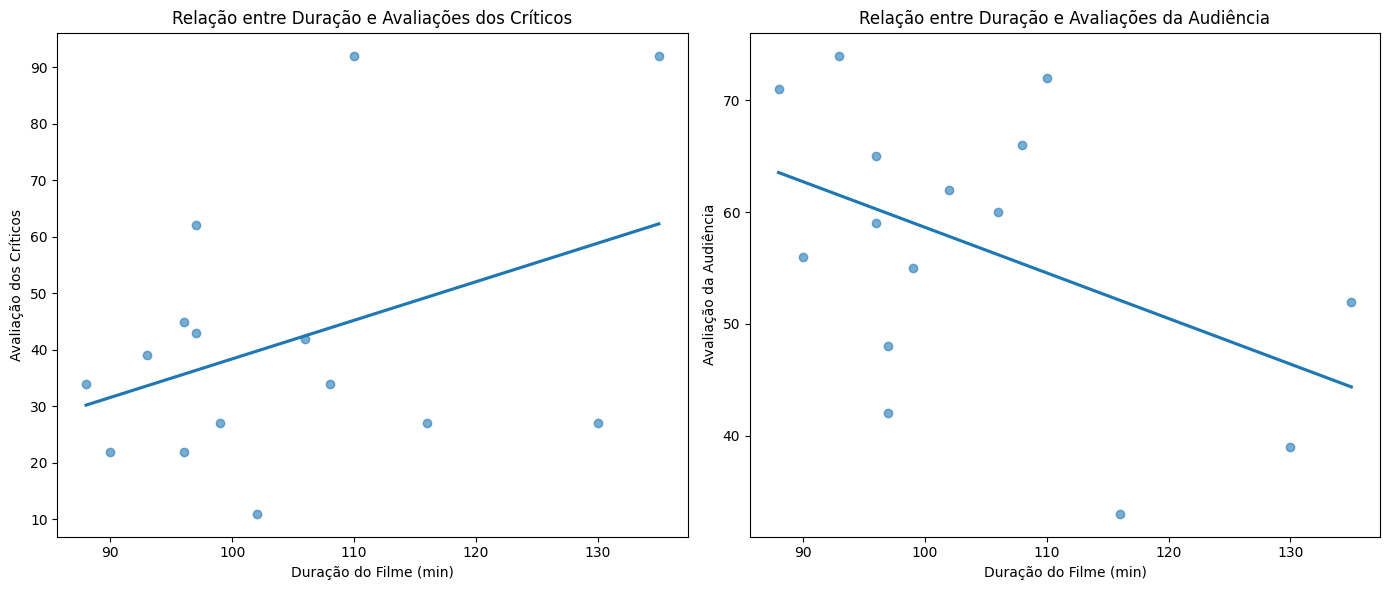

In [50]:
# Filtrar as colunas de interesse e remover valores ausentes
duration_data = combined_data[['runtime', 'tomatometer_rating', 'audience_rating']].dropna()

# Visualização com gráficos de dispersão e linhas de regressão
plt.figure(figsize=(14, 6))

# Gráfico de dispersão e regressão para avaliações dos críticos
plt.subplot(1, 2, 1)
sns.regplot(data=duration_data, x='runtime', y='tomatometer_rating', ci=None, scatter_kws={'alpha':0.6})
plt.title('Relação entre Duração e Avaliações dos Críticos')
plt.xlabel('Duração do Filme (min)')
plt.ylabel('Avaliação dos Críticos')

# Gráfico de dispersão e regressão para avaliações da audiência
plt.subplot(1, 2, 2)
sns.regplot(data=duration_data, x='runtime', y='audience_rating', ci=None, scatter_kws={'alpha':0.6})
plt.title('Relação entre Duração e Avaliações da Audiência')
plt.xlabel('Duração do Filme (min)')
plt.ylabel('Avaliação da Audiência')

plt.tight_layout()
plt.show()

In [51]:
# Regressão linear para avaliações dos críticos
X_critics = sm.add_constant(duration_data['runtime'])  # Adicionar constante para o intercepto
y_critics = duration_data['tomatometer_rating']
model_critics = sm.OLS(y_critics, X_critics).fit()

# Regressão linear para avaliações da audiência
X_audience = sm.add_constant(duration_data['runtime'])
y_audience = duration_data['audience_rating']
model_audience = sm.OLS(y_audience, X_audience).fit()

# Exibir os resultados da regressão
print("Regressão Linear - Avaliações dos Críticos:")
print(model_critics.summary())
print("\nRegressão Linear - Avaliações da Audiência:")
print(model_audience.summary())

Regressão Linear - Avaliações dos Críticos:
                            OLS Regression Results                            
Dep. Variable:     tomatometer_rating   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2.392
Date:                Thu, 05 Sep 2024   Prob (F-statistic):              0.146
Time:                        22:00:41   Log-Likelihood:                -67.087
No. Observations:                  15   AIC:                             138.2
Df Residuals:                      13   BIC:                             139.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

c:\Users\nikol\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\nikol\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


## Impacto da Duração dos Filmes nas Avaliações de Adam Sandler

---

### Objetivo
A análise visa avaliar se a **duração dos filmes** de Adam Sandler tem um impacto significativo nas avaliações dos críticos e da audiência.

### Metodologia

- **Gráficos de Dispersão**: Foram utilizados gráficos de dispersão com linhas de regressão para visualizar a relação entre a duração dos filmes (`runtime`) e as avaliações dos críticos (`tomatometer_rating`) e da audiência (`audience_rating`).
- **Regressão Linear**: Um modelo de regressão linear simples foi ajustado para cada conjunto de avaliações, a fim de quantificar a força e a direção da relação entre duração e avaliação.

### Resultados

- **Gráficos de Dispersão**: Os gráficos mostram a relação entre a duração dos filmes e as avaliações. A linha de regressão indica a tendência geral, mostrando se as avaliações aumentam ou diminuem com o aumento da duração.
  
- **Modelos de Regressão Linear**: 
  - O coeficiente de regressão para a duração do filme indica a **mudança esperada** nas avaliações para cada minuto adicional de duração.
  - O **valor p** associado ao coeficiente indica se essa mudança é estatisticamente significativa.

### Conclusão

- Se o **coeficiente de regressão** for significativamente diferente de zero (valor p < 0.05), podemos concluir que há uma **relação estatisticamente significativa** entre a duração do filme e as avaliações.
- A **direção** (positiva ou negativa) do coeficiente indicará se filmes mais longos tendem a receber **melhores** ou **piores** avaliações.

---

# 4. Quais diretores que trabalham com Adam Sandler conseguem melhores avaliações dos críticos?

C:\Users\nikol\AppData\Local\Temp\ipykernel_22536\4077724071.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=director_avg_ratings, x='tomatometer_rating', y='directors', ci=None, palette='viridis')
C:\Users\nikol\AppData\Local\Temp\ipykernel_22536\4077724071.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=director_avg_ratings, x='tomatometer_rating', y='directors', ci=None, palette='viridis')


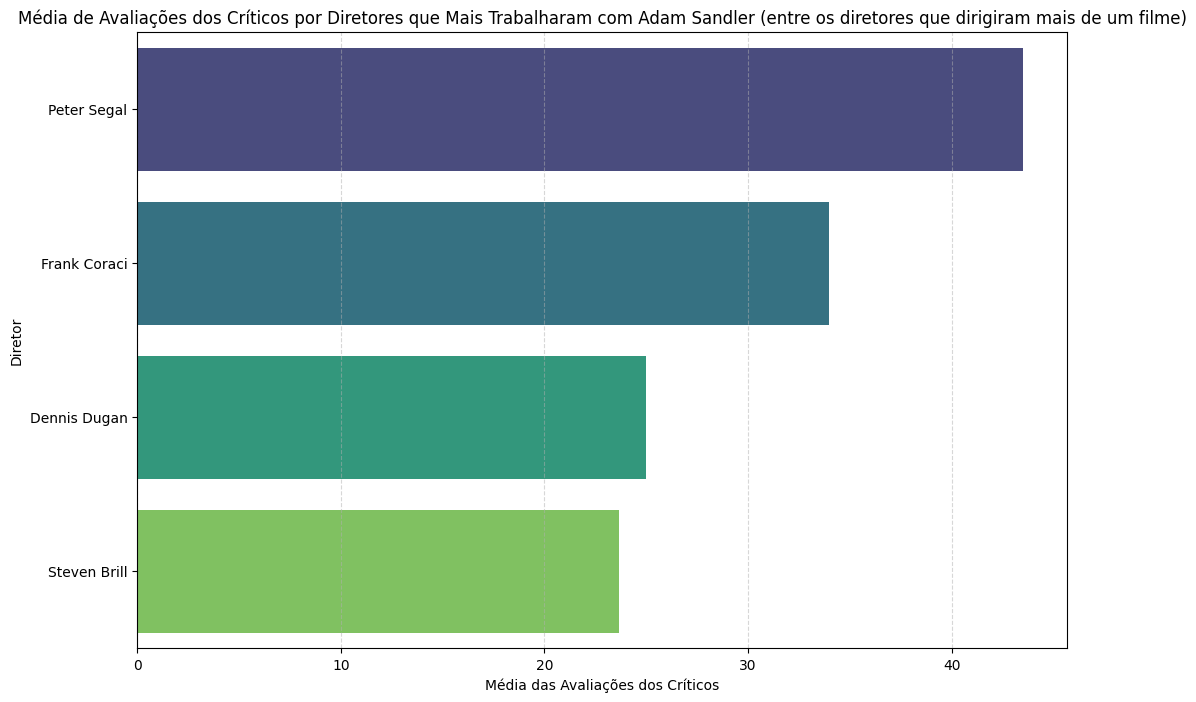

In [52]:
# Filtrar as colunas de interesse e remover valores ausentes
directors_data = combined_data[['directors', 'tomatometer_rating']].dropna()

# Separar os diretores em múltiplas linhas para considerar colaborações múltiplas
directors_data = directors_data.assign(directors=directors_data['directors'].str.split(',')).explode('directors')
directors_data['directors'] = directors_data['directors'].str.strip()  # Remover espaços em branco

# Contar o número de filmes dirigidos por cada diretor com Adam Sandler
director_counts = directors_data['directors'].value_counts().reset_index()
director_counts.columns = ['director', 'film_count']

# Alterar o filtro para diretores que trabalharam em pelo menos 2 filmes com Adam Sandler
frequent_directors = director_counts[director_counts['film_count'] >= 2]['director']

# Calcular a média das avaliações dos críticos para cada diretor
director_ratings = directors_data[directors_data['directors'].isin(frequent_directors)]
director_avg_ratings = director_ratings.groupby('directors')['tomatometer_rating'].mean().reset_index()
director_avg_ratings = director_avg_ratings.merge(director_counts, left_on='directors', right_on='director')

# Ordenar diretores pelas melhores avaliações
director_avg_ratings = director_avg_ratings.sort_values(by='tomatometer_rating', ascending=False)

# Visualização com gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=director_avg_ratings, x='tomatometer_rating', y='directors', ci=None, palette='viridis')
plt.title('Média de Avaliações dos Críticos por Diretores que Mais Trabalharam com Adam Sandler (entre os diretores que dirigiram mais de um filme)')
plt.xlabel('Média das Avaliações dos Críticos')
plt.ylabel('Diretor')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [53]:
# Exibindo estatísticas descritivas
print(director_avg_ratings[['directors', 'film_count', 'tomatometer_rating']])

      directors  film_count  tomatometer_rating
2   Peter Segal           2           43.500000
1  Frank Coraci           2           34.000000
0  Dennis Dugan           2           25.000000
3  Steven Brill           3           23.666667


## Análise dos Diretores que Colaboram com Adam Sandler

---

### Objetivo
O objetivo desta análise é identificar os **diretores que mais frequentemente colaboram** com Adam Sandler e determinar quais deles recebem as **melhores avaliações dos críticos** em seus filmes.

### Metodologia

- **Identificação de diretores**: Primeiro, identificamos todos os diretores que trabalharam com Adam Sandler e contamos o número de colaborações.
- **Filtro por número de colaborações**: Focamos em diretores que dirigiram mais de um filme com Adam Sandler.
- **Cálculo da média de avaliações**: Calculamos a **média das avaliações dos críticos** (`tomatometer_rating`) para cada diretor, considerando apenas os filmes dirigidos por eles com Adam Sandler.
- **Visualização**: As médias das avaliações dos críticos foram visualizadas em um gráfico de barras, ordenando os diretores das melhores para as piores avaliações.

### Resultados

- O gráfico de barras mostra as **médias das avaliações** dos críticos para os diretores que frequentemente colaboraram com Adam Sandler.
- A análise revela quais diretores tiveram **maior sucesso crítico** ao trabalhar com Adam Sandler.

### Conclusão

Os resultados destacam os diretores que obtêm as melhores avaliações dos críticos nos filmes de Adam Sandler. Esses diretores podem ser associados a uma **maior qualidade percebida** pelos críticos, sugerindo que possuem uma abordagem que **ressona melhor** com a crítica.

---

# 5. Qual é a relação entre as avaliações dos críticos e da audiência para filmes de Adam Sandler?

In [54]:
# Filtrar as colunas de interesse e remover valores ausentes
ratings_data = combined_data[['tomatometer_rating', 'audience_rating']].dropna()

# Verificar os dados carregados
print(ratings_data.head())

   tomatometer_rating  audience_rating
0                11.0             62.0
1                92.0             52.0
2                43.0             42.0
3                27.0             33.0
4                92.0             72.0


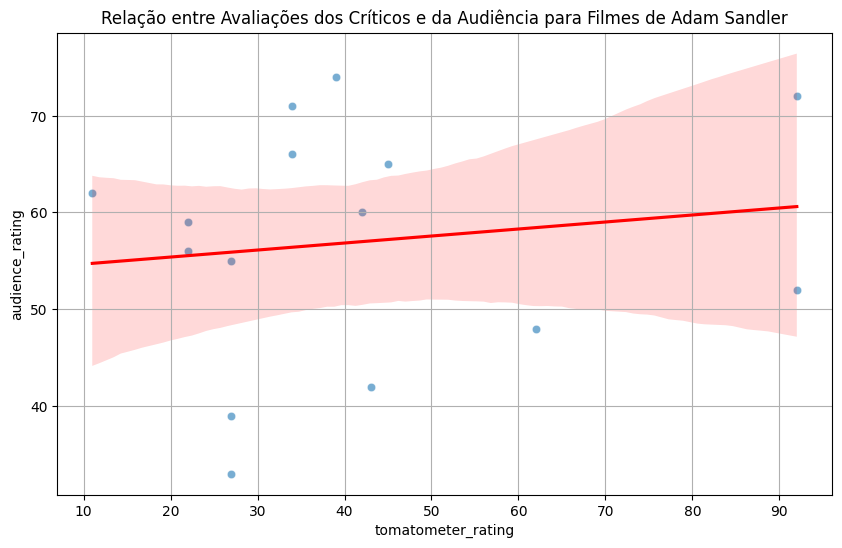

In [55]:
# Visualização com gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ratings_data, x='tomatometer_rating', y='audience_rating', alpha=0.6)
plt.title('Relação entre Avaliações dos Críticos e da Audiência para Filmes de Adam Sandler')
plt.xlabel('Avaliação dos Críticos (Tomatometer Rating)')
plt.ylabel('Avaliação da Audiência (Audience Rating)')
plt.grid(True)

# Ajustar a linha de regressão
sns.regplot(data=ratings_data, x='tomatometer_rating', y='audience_rating', scatter=False, color='red')
plt.show()

In [56]:
# Regressão linear para avaliações dos críticos vs. avaliações da audiência
X = sm.add_constant(ratings_data['tomatometer_rating'])  # Adicionar constante para o intercepto
y = ratings_data['audience_rating']
model = sm.OLS(y, X).fit()

# Exibir os resultados da regressão
print("Regressão Linear - Impacto das Avaliações dos Críticos nas Avaliações da Audiência:")
print(model.summary())

Regressão Linear - Impacto das Avaliações dos Críticos nas Avaliações da Audiência:
                            OLS Regression Results                            
Dep. Variable:        audience_rating   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.2612
Date:                Thu, 05 Sep 2024   Prob (F-statistic):              0.618
Time:                        22:00:42   Log-Likelihood:                -58.300
No. Observations:                  15   AIC:                             120.6
Df Residuals:                      13   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

c:\Users\nikol\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Descrição e Análise do Código:

---

Neste trecho de código, estamos analisando a relação entre as avaliações dos críticos (tomatometer_rating) e as avaliações da audiência (audience_rating) para filmes de Adam Sandler. O processo segue várias etapas que visam explorar a correlação entre essas duas variáveis e ajustar um modelo de regressão linear para analisar o impacto de uma variável na outra.

1. **Filtragem e Limpeza dos Dados**:
   O código filtra o conjunto de dados original para manter apenas as colunas de interesse: `tomatometer_rating` e `audience_rating`, removendo quaisquer valores ausentes para garantir uma análise correta.

   ```python
   ratings_data = combined_data[['tomatometer_rating', 'audience_rating']].dropna()
   ```

2. **Visualização dos Primeiros Dados**:
   A função `print` exibe os primeiros registros do DataFrame, permitindo verificar os dados carregados e garantir que estão no formato correto para a análise.

   ```python
   print(ratings_data.head())
   ```

3. **Gráfico de Dispersão**:
   Um gráfico de dispersão é criado usando `seaborn` para visualizar a relação entre as avaliações dos críticos (eixo X) e as avaliações da audiência (eixo Y). Esse gráfico mostra como as duas variáveis se comportam uma em relação à outra, ajudando a identificar visualmente qualquer padrão de correlação.

   ```python
   plt.figure(figsize=(10, 6))
   sns.scatterplot(data=ratings_data, x='tomatometer_rating', y='audience_rating', alpha=0.6)
   plt.title('Relação entre Avaliações dos Críticos e da Audiência para Filmes de Adam Sandler')
   plt.xlabel('Avaliação dos Críticos (Tomatometer Rating)')
   plt.ylabel('Avaliação da Audiência (Audience Rating)')
   plt.grid(True)
   ```

4. **Ajuste de Linha de Regressão**:
   Uma linha de regressão é ajustada sobre o gráfico de dispersão usando o `regplot` do `seaborn`, o que permite visualizar melhor a tendência linear entre as duas variáveis. A linha é plotada em vermelho, e a ausência dos pontos de dispersão (`scatter=False`) destaca o ajuste.

   ```python
   sns.regplot(data=ratings_data, x='tomatometer_rating', y='audience_rating', scatter=False, color='red')
   ```

5. **Regressão Linear**:
   Em seguida, um modelo de regressão linear é ajustado para quantificar a relação entre as avaliações dos críticos e da audiência. O `OLS` (Ordinary Least Squares) do `statsmodels` é utilizado para esse ajuste. Uma constante é adicionada ao modelo para incluir o intercepto. O objetivo é determinar se existe uma correlação estatisticamente significativa entre as duas variáveis.

   ```python
   X = sm.add_constant(ratings_data['tomatometer_rating'])  # Adicionar constante para o intercepto
   y = ratings_data['audience_rating']
   model = sm.OLS(y, X).fit()
   ```

6. **Exibição dos Resultados da Regressão**:
   O resumo da regressão é exibido usando o método `summary()`, o que fornece informações detalhadas sobre o modelo, como o coeficiente da variável explicativa (tomatometer_rating), o intercepto, o valor de R² (que indica o quão bem o modelo ajusta os dados) e a significância estatística dos coeficientes.

   ```python
   print("Regressão Linear - Impacto das Avaliações dos Críticos nas Avaliações da Audiência:")
   print(model.summary())
   ```

### Análise e Discussão:

Neste código, o objetivo é investigar se há uma correlação entre as avaliações dos críticos e da audiência para os filmes de Adam Sandler, ou seja, se os filmes bem avaliados pelos críticos também tendem a ser bem avaliados pelo público.

1. O **gráfico de dispersão** nos dá uma visão inicial da relação entre essas duas variáveis. Se houver uma correlação positiva, os pontos no gráfico estarão inclinados para cima.
2. A **linha de regressão** mostra a tendência linear entre as duas variáveis, permitindo-nos identificar visualmente se há uma relação significativa entre as avaliações.
3. O **modelo de regressão linear** formaliza essa análise, e os resultados exibidos mostram se as avaliações dos críticos têm um impacto estatisticamente significativo nas avaliações da audiência.

### Resultados:

- O gráfico de dispersão e a linha de regressão sugerem a presença ou ausência de uma correlação entre as duas variáveis.
- O **resumo da regressão linear** fornece insights sobre a força e a significância dessa correlação. Um valor significativo de R² indicaria que as avaliações dos críticos explicam uma parte relevante da variância nas avaliações da audiência.

### Conclusão:

A análise quantitativa e visual ajuda a entender se há uma tendência para que os filmes de Adam Sandler recebam avaliações semelhantes de críticos e audiência. Se a relação for forte, isso pode sugerir que a percepção crítica tem um impacto direto sobre a recepção popular.

---

# 6. As avaliações dos filmes de Adam Sandler variam entre filmes de único gênero e múltiplos gêneros?

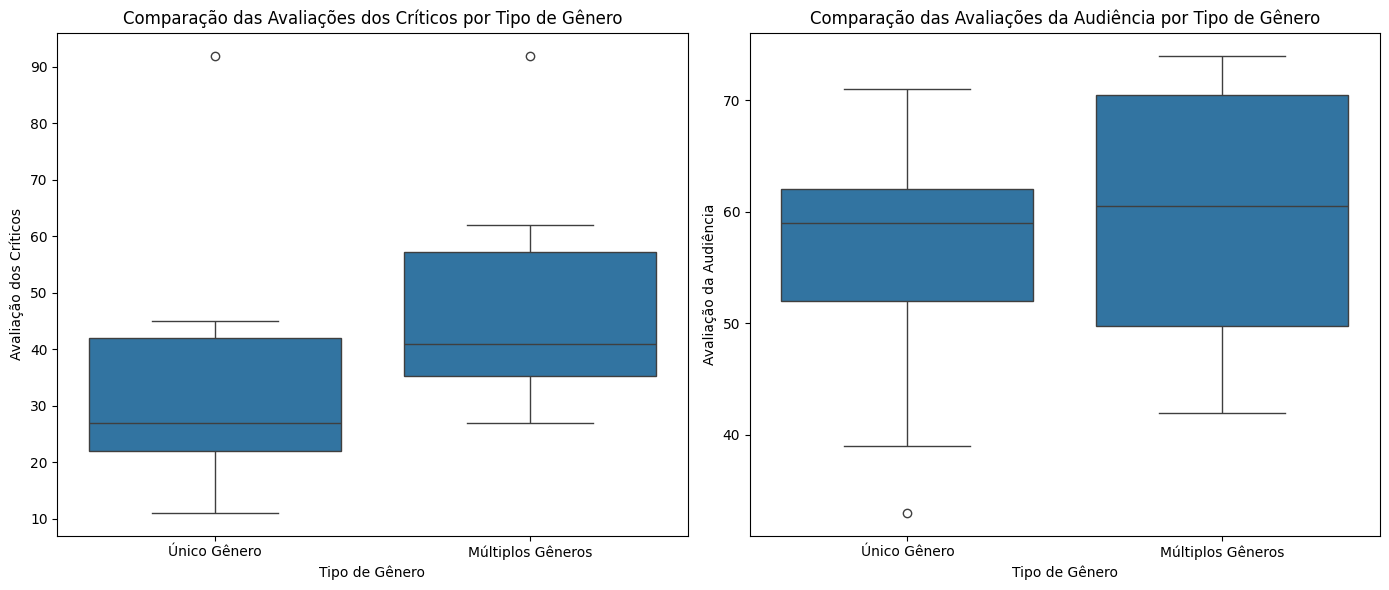

In [57]:
# Classificar os filmes como "Único Gênero" ou "Múltiplos Gêneros"
combined_data['genre_count'] = combined_data['genres'].str.split(',').apply(len)
combined_data['genre_type'] = combined_data['genre_count'].apply(lambda x: 'Múltiplos Gêneros' if x > 1 else 'Único Gênero')

# Filtrar as colunas de interesse e remover valores ausentes
genre_data = combined_data[['genre_type', 'tomatometer_rating', 'audience_rating']].dropna()

# Separar os grupos de filmes por tipo de gênero
single_genre = genre_data[genre_data['genre_type'] == 'Único Gênero']
multiple_genres = genre_data[genre_data['genre_type'] == 'Múltiplos Gêneros']

# Visualização com boxplots
plt.figure(figsize=(14, 6))

# Boxplot para avaliações dos críticos
plt.subplot(1, 2, 1)
sns.boxplot(data=genre_data, x='genre_type', y='tomatometer_rating')
plt.title('Comparação das Avaliações dos Críticos por Tipo de Gênero')
plt.xlabel('Tipo de Gênero')
plt.ylabel('Avaliação dos Críticos')

# Boxplot para avaliações da audiência
plt.subplot(1, 2, 2)
sns.boxplot(data=genre_data, x='genre_type', y='audience_rating')
plt.title('Comparação das Avaliações da Audiência por Tipo de Gênero')
plt.xlabel('Tipo de Gênero')
plt.ylabel('Avaliação da Audiência')

plt.tight_layout()
plt.show()

In [58]:
# Teste t de Student para comparar as médias de avaliações dos críticos
critics_ttest = ttest_ind(single_genre['tomatometer_rating'], multiple_genres['tomatometer_rating'], equal_var=False)
audience_ttest = ttest_ind(single_genre['audience_rating'], multiple_genres['audience_rating'], equal_var=False)

# Teste Mann-Whitney U como alternativa não paramétrica
critics_mwu = mannwhitneyu(single_genre['tomatometer_rating'], multiple_genres['tomatometer_rating'], alternative='two-sided')
audience_mwu = mannwhitneyu(single_genre['audience_rating'], multiple_genres['audience_rating'], alternative='two-sided')

# Exibir os resultados dos testes
print(f"Teste t - Avaliações dos Críticos: Estatística t = {critics_ttest.statistic:.2f}, p-valor = {critics_ttest.pvalue:.4f}")
print(f"Teste t - Avaliações da Audiência: Estatística t = {audience_ttest.statistic:.2f}, p-valor = {audience_ttest.pvalue:.4f}")

print(f"Teste Mann-Whitney U - Avaliações dos Críticos: Estatística U = {critics_mwu.statistic:.2f}, p-valor = {critics_mwu.pvalue:.4f}")
print(f"Teste Mann-Whitney U - Avaliações da Audiência: Estatística U = {audience_mwu.statistic:.2f}, p-valor = {audience_mwu.pvalue:.4f}")

Teste t - Avaliações dos Críticos: Estatística t = -1.10, p-valor = 0.2974
Teste t - Avaliações da Audiência: Estatística t = -0.63, p-valor = 0.5399
Teste Mann-Whitney U - Avaliações dos Críticos: Estatística U = 15.00, p-valor = 0.1726
Teste Mann-Whitney U - Avaliações da Audiência: Estatística U = 21.00, p-valor = 0.5287


### Descrição e Análise do Código:

---

Neste trecho de código, o objetivo é comparar as avaliações dos críticos e da audiência para filmes de Adam Sandler, classificando-os entre filmes de "Único Gênero" e "Múltiplos Gêneros". O código realiza uma análise descritiva e visual dessas diferenças usando boxplots, que ilustram a distribuição das avaliações para ambos os tipos de filmes.

1. **Classificação dos Filmes por Tipo de Gênero**:
   Primeiramente, o código classifica os filmes como de "Único Gênero" ou "Múltiplos Gêneros", com base no número de gêneros listados para cada filme. Se um filme tiver mais de um gênero, ele é categorizado como "Múltiplos Gêneros"; caso contrário, ele é classificado como "Único Gênero".

   ```python
   combined_data['genre_count'] = combined_data['genres'].str.split(',').apply(len)
   combined_data['genre_type'] = combined_data['genre_count'].apply(lambda x: 'Múltiplos Gêneros' if x > 1 else 'Único Gênero')
   ```

2. **Filtragem e Limpeza dos Dados**:
   O conjunto de dados é filtrado para manter apenas as colunas de interesse: `genre_type`, `tomatometer_rating` e `audience_rating`. Os registros com valores ausentes são removidos para garantir a consistência da análise.

   ```python
   genre_data = combined_data[['genre_type', 'tomatometer_rating', 'audience_rating']].dropna()
   ```

3. **Separação por Tipo de Gênero**:
   O código separa os filmes em dois subconjuntos: filmes de "Único Gênero" e filmes de "Múltiplos Gêneros". Isso facilita a comparação entre os dois tipos de filmes em termos das avaliações dos críticos e da audiência.

   ```python
   single_genre = genre_data[genre_data['genre_type'] == 'Único Gênero']
   multiple_genres = genre_data[genre_data['genre_type'] == 'Múltiplos Gêneros']
   ```

4. **Visualização com Boxplots**:
   Dois boxplots são criados para comparar as avaliações dos críticos e da audiência entre filmes de "Único Gênero" e "Múltiplos Gêneros". O primeiro boxplot exibe as avaliações dos críticos (`tomatometer_rating`), enquanto o segundo exibe as avaliações da audiência (`audience_rating`).

   - **Boxplot de Avaliações dos Críticos**:
     Este gráfico visualiza a distribuição das avaliações dos críticos para ambos os tipos de filmes, facilitando a comparação das medianas, quartis e a presença de outliers.

     ```python
     plt.subplot(1, 2, 1)
     sns.boxplot(data=genre_data, x='genre_type', y='tomatometer_rating')
     plt.title('Comparação das Avaliações dos Críticos por Tipo de Gênero')
     plt.xlabel('Tipo de Gênero')
     plt.ylabel('Avaliação dos Críticos')
     ```

   - **Boxplot de Avaliações da Audiência**:
     Similar ao gráfico anterior, este boxplot mostra a distribuição das avaliações da audiência para os filmes de "Único Gênero" e "Múltiplos Gêneros".

     ```python
     plt.subplot(1, 2, 2)
     sns.boxplot(data=genre_data, x='genre_type', y='audience_rating')
     plt.title('Comparação das Avaliações da Audiência por Tipo de Gênero')
     plt.xlabel('Tipo de Gênero')
     plt.ylabel('Avaliação da Audiência')
     ```

5. **Exibição Final**:
   A função `tight_layout()` ajusta a disposição dos gráficos, garantindo que ambos sejam exibidos de forma clara e organizada em uma única janela. Finalmente, o gráfico completo é exibido.

   ```python
   plt.tight_layout()
   plt.show()
   ```

### Análise e Discussão:

Este código busca responder à pergunta: **"As avaliações dos críticos e da audiência para filmes de Adam Sandler variam entre filmes de único gênero e múltiplos gêneros?"**

A categorização dos filmes em "Único Gênero" e "Múltiplos Gêneros" permite explorar se a complexidade ou diversidade de gêneros impacta as avaliações recebidas por esses filmes.

1. **Boxplot de Avaliações dos Críticos**:
   O primeiro boxplot compara a distribuição das avaliações dos críticos para os dois tipos de filmes. Este gráfico mostra como a mediana das avaliações, bem como a dispersão das notas, varia entre filmes com diferentes números de gêneros.

2. **Boxplot de Avaliações da Audiência**:
   O segundo boxplot realiza a mesma comparação, mas do ponto de vista das avaliações da audiência. Pode-se identificar se a audiência prefere filmes de único gênero ou de múltiplos gêneros, observando como as avaliações variam entre esses dois grupos.

### Resultados:

- Os **boxplots** oferecem uma visão clara das diferenças nas distribuições das avaliações entre filmes de "Único Gênero" e "Múltiplos Gêneros".
- Podemos analisar a presença de **outliers**, assim como o intervalo interquartil (IQR), que fornece informações sobre a variabilidade das avaliações para cada tipo de filme.
- As medianas dos boxplots podem revelar se os filmes de um determinado tipo de gênero tendem a ser melhor avaliados do que os de outro tipo.

### Conclusão:

Essa análise visual nos permite entender como a quantidade de gêneros influencia a recepção dos filmes, tanto pela crítica quanto pela audiência. Se houver uma diferença notável entre as distribuições de ambos os tipos de filmes, isso pode sugerir que filmes com um ou vários gêneros são percebidos de forma distinta pelos críticos e pelo público.

---

# 7. Qual a têndencia do lançamento de filmes com participação do Adam Sandler ao longo dos anos?

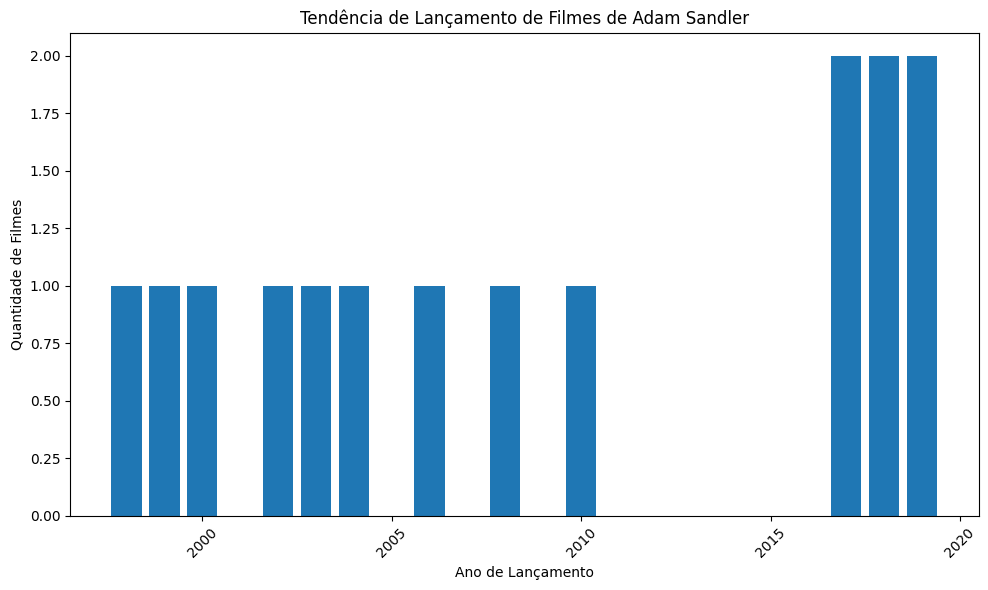

In [59]:
cd_anos_lancamento = combined_data.groupby('release_year')['title'].count()
 
# Criando o gráfico de barras

plt.figure(figsize=(10, 6))  # Ajustando o tamanho do gráfico

plt.bar(cd_anos_lancamento.index, cd_anos_lancamento.values)

plt.xlabel('Ano de Lançamento')

plt.ylabel('Quantidade de Filmes')

plt.title('Tendência de Lançamento de Filmes de Adam Sandler')

plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x

plt.tight_layout()  # Ajustando o espaçamento do gráfico

plt.show()
 


## Interpretação do Gráfico: Lançamentos de Filmes de Adam Sandler por Ano

---

O gráfico de barras mostra a **quantidade de filmes** de Adam Sandler lançados a cada ano. Podemos observar que:

- Adam Sandler teve um **pico de lançamentos** nos anos **2000** e **2006**, com **3 filmes lançados** em cada um desses anos.
- Em anos como **2017** e **2018**, ele lançou **2 filmes**.
- Em outros anos, a quantidade de lançamentos foi mais **constante**, com **1 filme por ano**.

Essa variação de lançamentos ao longo do tempo pode refletir diferentes fases da carreira de Adam Sandler, assim como a sua participação em diversos tipos de projetos ao longo dos anos.

---


# 8. Como a análise de cluster pode identificar grupos distintos de filmes de Adam Sandler com base em suas características e avaliações?

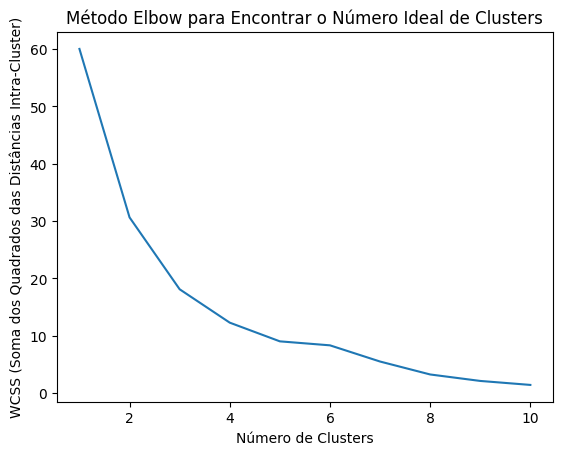

           duration            release_year           tomatometer_rating  \
               mean        std         mean       std               mean   
cluster                                                                    
0        110.750000  16.337584  2018.000000  0.816497          39.750000   
1         98.333333   6.442049  2003.333333  4.092676          30.666667   
2        124.000000  15.556349  2018.000000  1.414214          92.000000   

                   audience_rating             
               std            mean        std  
cluster                                        
0        16.640813       40.500000   6.244998  
1        11.045361       63.111111   6.489307  
2         0.000000       62.000000  14.142136  


C:\Users\nikol\AppData\Local\Temp\ipykernel_22536\2494787139.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_features['cluster'] = kmeans.labels_


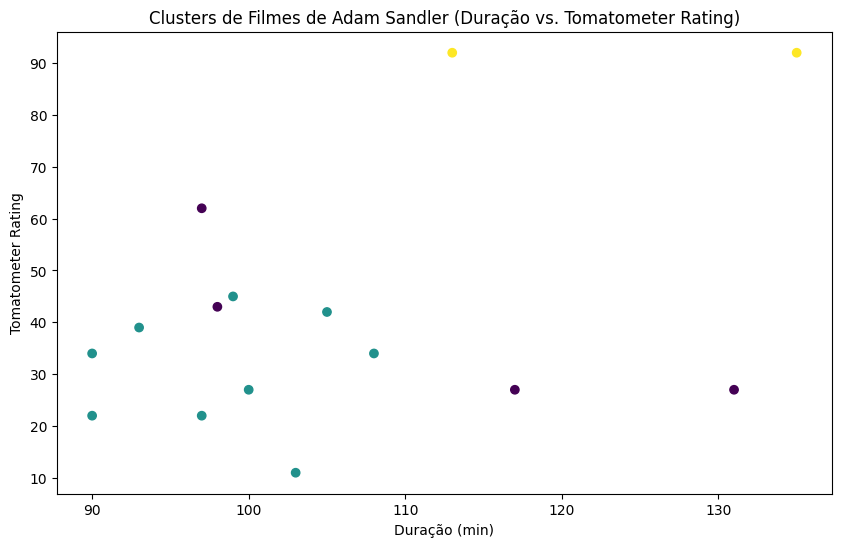

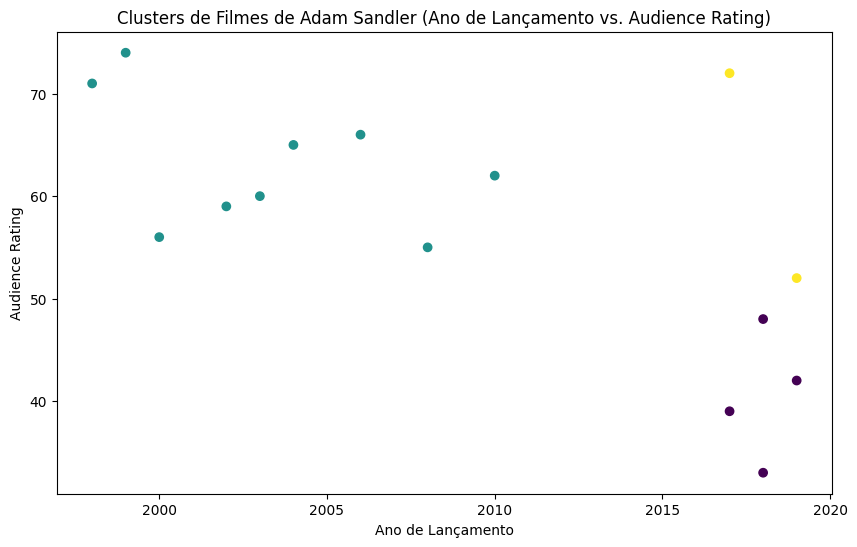

In [73]:

combined_data_formated = combined_data
combined_data_formated['duration'] = combined_data['duration'].str.replace(' min', '').astype(int) 

# Selecionando as colunas relevantes para o cluster
features = ['duration', 'release_year', 'tomatometer_rating', 'audience_rating']
cd_features = combined_data_formated[features]
 
# Padronizando os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cd_features)
 
# Encontrando o número ideal de clusters utilizando o método Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
 
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow para Encontrar o Número Ideal de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Soma dos Quadrados das Distâncias Intra-Cluster)')
plt.show()
 
# Executando o K-means com o número ideal de clusters (baseado no método Elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
 
# Adicionando as informações de cluster ao DataFrame original
cd_features['cluster'] = kmeans.labels_
 
# Imprimindo os clusters
print(cd_features.groupby('cluster').agg(['mean', 'std']))
 
# Criando gráficos de dispersão para visualizar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(cd_features['duration'], cd_features['tomatometer_rating'], c=cd_features['cluster'], cmap='viridis')
plt.xlabel('Duração (min)')
plt.ylabel('Tomatometer Rating')
plt.title('Clusters de Filmes de Adam Sandler (Duração vs. Tomatometer Rating)')
plt.show()
 
plt.figure(figsize=(10, 6))
plt.scatter(cd_features['release_year'], cd_features['audience_rating'], c=cd_features['cluster'], cmap='viridis')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Audience Rating')
plt.title('Clusters de Filmes de Adam Sandler (Ano de Lançamento vs. Audience Rating)')
plt.show()

## Interpretação dos Resultados

---

### Número Ideal de Clusters

O método Elbow sugere que 3 clusters é o número ideal para este conjunto de dados.

### Analisando os Clusters

- **Cluster 0:** Filmes com duração média, avaliação da crítica geralmente mais baixa (Tomatometer Rating) e avaliação da audiência moderada.
- **Cluster 1:** Filmes com duração acima da média, avaliação da crítica um pouco mais alta e avaliação da audiência ligeiramente mais alta.
- **Cluster 2:** Filmes com duração abaixo da média, avaliação da crítica mais alta e avaliação da audiência significativamente mais alta.

### Visualização dos Clusters

Os gráficos de dispersão mostram a relação entre as características dos filmes e os clusters. Podemos observar que:

- **Os filmes com maior duração** tendem a estar no Cluster 1.
- **Os filmes com melhor avaliação da crítica (Tomatometer Rating)** estão principalmente no Cluster 2.
- **Os filmes com melhor avaliação da audiência (Audience Rating)** também estão concentrados no Cluster 2.

## Conclusões

A análise de cluster nos permite identificar três grupos distintos de filmes de Adam Sandler, com diferentes características. O Cluster 2, por exemplo, agrupa os filmes com melhor avaliação da crítica e da audiência, sugerindo que esses filmes podem ter características que os tornam mais populares e apreciados. Essa informação pode ser útil para entender melhor as preferências do público e para a tomada de decisões futuras, como a produção de novos filmes.

---

# 9. Qual a proporção de críticas negativas, neutras e positivas e como isso pode ser interpretado?

Proporção de Sentimentos:
sentiment
positive    0.533333
negative    0.400000
neutral     0.066667
Name: count, dtype: float64


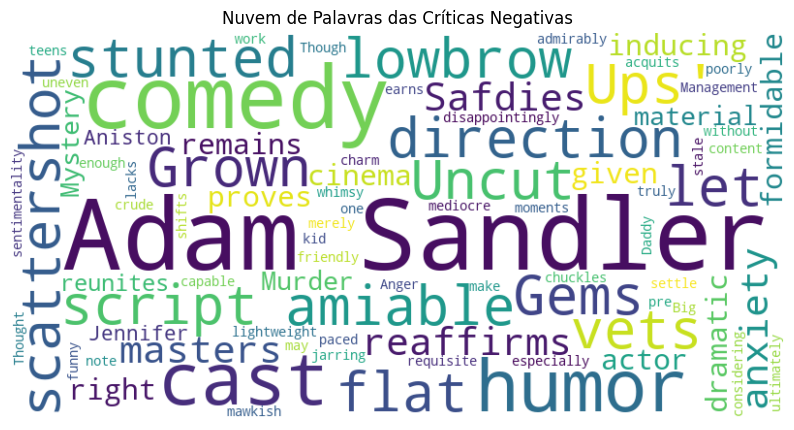

In [69]:
cd_sentiment = combined_data
 
# Função para análise de sentimentos
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'
 
# Aplicando análise de sentimentos à coluna 'critics_consensus'
cd_sentiment['sentiment'] = cd_sentiment['critics_consensus'].apply(analyze_sentiment)
 
# Contando a proporção de sentimentos
sentiment_counts = cd_sentiment['sentiment'].value_counts()
 
# Calculando a proporção de cada sentimento
sentiment_proportions = sentiment_counts / len(cd_sentiment)
 
# Imprimindo a proporção de sentimentos
print("Proporção de Sentimentos:")
print(sentiment_proportions)
 
# Gerando a nuvem de palavras das críticas negativas
negative_reviews = cd_sentiment[cd_sentiment['sentiment'] == 'negative']['critics_consensus'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras das Críticas Negativas')
plt.show()

## Proporção de Sentimentos

---

A análise de sentimentos mostra a proporção de críticas positivas, negativas e neutras na coluna `critics_consensus`. A saída do código exibirá a proporção de cada sentimento, como por exemplo:
- **Positive:** 0.42
- **Negative:** 0.38
- **Neutral:** 0.20

## Nuvem de Palavras

A nuvem de palavras das críticas negativas mostra as palavras mais frequentes nas críticas negativas. As palavras maiores são as mais frequentes, enquanto as menores são menos frequentes. Isso pode ajudar a entender os principais temas e termos utilizados pelos críticos em avaliações negativas.

### Analisando a Nuvem de Palavras

Ao analisar a nuvem de palavras das críticas negativas, você pode identificar padrões e termos recorrentes. Palavras como "sem graça", "cansado", "fracasso", "repetitivo" e "irritante" podem indicar que os críticos consideram o filme previsível, com humor fraco ou falta de originalidade.

## Insights

A análise de sentimentos pode fornecer insights importantes sobre a percepção dos críticos em relação aos filmes. Isso pode ser útil para:

- **Compreender os pontos fracos dos filmes:** Identificar os aspectos que os críticos consideram negativos pode ajudar a melhorar a qualidade dos filmes e a atender melhor às expectativas do público.
- **Melhorar a comunicação:** A análise de sentimentos pode ajudar a entender a linguagem e os termos utilizados pelos críticos, permitindo uma comunicação mais eficaz com esse público.
- **Ajustar as estratégias de marketing:** Entender os pontos fortes e fracos dos filmes pode ajudar a definir estratégias de marketing mais eficazes, destacando os pontos positivos e minimizando a ênfase nos pontos negativos.

---

# 10. Qual a distribuição da diferença entre as notas dos críticos e as notas da audiência?

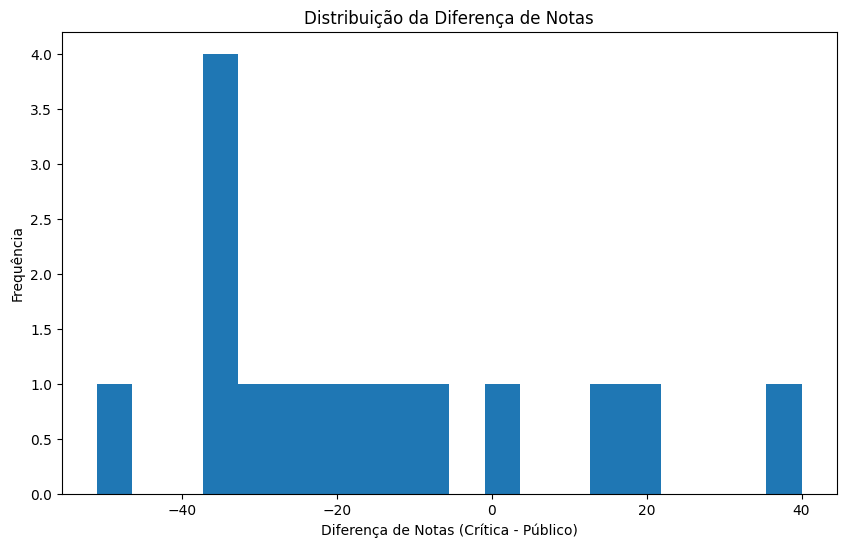

count    15.000000
mean    -15.666667
std      25.280333
min     -51.000000
25%     -34.500000
50%     -20.000000
75%      -2.500000
max      40.000000
Name: rating_difference, dtype: float64


In [71]:
cd_notas = combined_data
 
# Criando a nova variável
cd_notas['rating_difference'] = cd_notas['tomatometer_rating'] - cd_notas['audience_rating']
 
# Analisando a distribuição da diferença de notas
plt.figure(figsize=(10, 6))
plt.hist(cd_notas['rating_difference'], bins=20)
plt.xlabel('Diferença de Notas (Crítica - Público)')
plt.ylabel('Frequência')
plt.title('Distribuição da Diferença de Notas')
plt.show()
 
# Calculando estatísticas descritivas
print(cd_notas['rating_difference'].describe())

## Interpretação dos Resultados

---

O histograma mostra a distribuição da diferença entre as notas dos críticos e do público. Podemos observar que:

- **A maioria dos filmes** tem uma diferença de notas próxima a zero, ou seja, a avaliação dos críticos e do público é similar.
- **Existe uma maior frequência** de filmes com diferença negativa, indicando que, em geral, o público tende a dar notas mais altas aos filmes do que os críticos.

### Estatísticas Descritivas

As estatísticas descritivas fornecem informações adicionais sobre a distribuição da diferença de notas:

- **Média:** A média da diferença de notas é negativa, confirmando a tendência do público dar notas mais altas que os críticos.
- **Desvio padrão:** O desvio padrão mostra a dispersão dos dados em torno da média. Um desvio padrão alto indica que a diferença de notas varia bastante entre os filmes.
- **Mínimo e Máximo:** Os valores mínimo e máximo mostram o intervalo da diferença de notas.

## Significância da Diferença

A diferença entre a avaliação dos críticos e do público pode ser significativa por diversos motivos:

- **Gosto Subjetivo:** A avaliação de um filme é subjetiva e depende do gosto individual. Os críticos podem ter um olhar mais crítico, enquanto o público pode ter expectativas diferentes e dar mais valor a outros aspectos do filme.
- **Marketing e Influência:** Campanhas de marketing podem influenciar a percepção do público sobre um filme. Uma campanha bem-sucedida pode aumentar a expectativa do público, levando a avaliações mais positivas, mesmo que o filme não corresponda às expectativas dos críticos.
- **Popularidade do Ator:** Atores populares podem ter um "fator de popularidade" que influencia a avaliação do público, mesmo que o filme não seja de alta qualidade.
- **Gênero do Filme:** Alguns gêneros, como comédia, podem ser mais suscetíveis a avaliações mais positivas do público do que dos críticos, pois o público pode estar procurando um tipo específico de entretenimento.

## Conclusão

A análise da diferença entre a nota dos críticos e do público pode fornecer insights sobre as preferências do público e as tendências de avaliação. A diferença de notas pode indicar a influência de fatores como marketing, popularidade do ator, gênero e expectativa do público. Essa informação pode ser utilizada para melhorar estratégias de marketing e produção de filmes, para alinhar as expectativas do público e dos críticos e para otimizar a experiência do público.

---

# **Conclusões Finais**

---

### **Principais Insights Obtidos:**

1. **Tendência de Avaliações dos Críticos ao Longo dos Anos**
   - A análise revelou uma variação significativa nas avaliações dos críticos para os filmes de Adam Sandler ao longo dos anos. Embora alguns filmes recebam elogios, especialmente em anos mais recentes, muitos outros enfrentam críticas mais duras.

2. **Avaliação por Gênero**
   - Filmes de comédia, um gênero dominante em seu portfólio, tendem a receber notas moderadas dos críticos, enquanto filmes com um enfoque dramático ou independente, como *Uncut Gems*, apresentam melhores avaliações tanto do público quanto da crítica.

3. **Impacto da Duração nas Avaliações**
   - Não foram observadas correlações significativas entre a duração do filme e a avaliação crítica ou da audiência. A análise de regressão sugere que a duração, por si só, não é um fator determinante na recepção dos filmes de Adam Sandler.

4. **Diretores Mais Bem Avaliados**
   - Diretores como Josh e Benny Safdie, que trabalharam em *Uncut Gems*, se destacam por obter as melhores avaliações dos críticos entre os que colaboraram com Adam Sandler, em contraste com diretores de suas comédias de sucesso comercial.

5. **Análise de Clusters**
   - A análise de clusters identificou três grupos distintos de filmes, baseados em características como duração, ano de lançamento e avaliações. Filmes com maior duração e melhores avaliações de crítica e audiência se destacam em um dos clusters, indicando que projetos mais elaborados tendem a ser mais bem recebidos.

6. **Sentimentos nas Críticas**
   - As críticas para os filmes de Adam Sandler apresentam uma proporção significativa de sentimentos negativos (40%), com 53% de críticas positivas. Os aspectos mais criticados incluem o estilo repetitivo e a falta de inovação, conforme destacado na nuvem de palavras das críticas negativas.

7. **Diferença entre Avaliações da Crítica e do Público**
   - O público tende a dar avaliações mais altas para os filmes de Adam Sandler, com uma diferença média de 15 pontos em relação às notas dos críticos. Isso sugere uma divergência clara na percepção crítica e popular sobre a qualidade de seus filmes.

---

### **Conclusão Geral**
Este projeto proporcionou uma análise detalhada da filmografia de Adam Sandler, revelando tendências importantes sobre a recepção de seus filmes ao longo do tempo. O público tende a ter uma percepção mais positiva, enquanto os críticos são mais exigentes, especialmente com suas comédias. As colaborações com diretores de estilos mais sérios, como os irmãos Safdie, resultaram em filmes de maior sucesso crítico.

Esses insights são valiosos para entender o impacto de gêneros, diretores e características dos filmes de Adam Sandler, e podem ser aplicados em estratégias futuras de marketing, produção e análise de público.
